# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [64]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | kaedi
Processing Record 3 of Set 1 | naberera
Processing Record 4 of Set 1 | ciudad lazaro cardenas
Processing Record 5 of Set 1 | ofunato
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | gamba
Processing Record 8 of Set 1 | porbandar
Processing Record 9 of Set 1 | sinabang
Processing Record 10 of Set 1 | iskateley
Processing Record 11 of Set 1 | ribeira brava
Processing Record 12 of Set 1 | thulamahashi
Processing Record 13 of Set 1 | aykhal
Processing Record 14 of Set 1 | mazagao
Processing Record 15 of Set 1 | bokovskaya
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | hasaki
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | juegang
Processing Record 22 of Set 1 | haiku-pauwela
Processing Record 23 o

Processing Record 39 of Set 4 | cidreira
Processing Record 40 of Set 4 | laascaanood
Processing Record 41 of Set 4 | tiksi
Processing Record 42 of Set 4 | yemetsk
Processing Record 43 of Set 4 | mahina
Processing Record 44 of Set 4 | rustenburg
Processing Record 45 of Set 4 | usogorsk
Processing Record 46 of Set 4 | sisimiut
Processing Record 47 of Set 4 | kathmandu
Processing Record 48 of Set 4 | bamboo flat
Processing Record 49 of Set 4 | qarqaraly
Processing Record 0 of Set 5 | thompson
Processing Record 1 of Set 5 | avarua
Processing Record 2 of Set 5 | petropavlovsk-kamchatsky
Processing Record 3 of Set 5 | port alfred
Processing Record 4 of Set 5 | ulety
Processing Record 5 of Set 5 | santa lucia
Processing Record 6 of Set 5 | tralee
Processing Record 7 of Set 5 | greymouth
Processing Record 8 of Set 5 | tsiombe
Processing Record 9 of Set 5 | hillsdale
Processing Record 10 of Set 5 | juneau
Processing Record 11 of Set 5 | el haouaria
Processing Record 12 of Set 5 | campo gallo
Pr

Processing Record 32 of Set 8 | anchorage
Processing Record 33 of Set 8 | hinton
Processing Record 34 of Set 8 | glendive
Processing Record 35 of Set 8 | meiktila
Processing Record 36 of Set 8 | christchurch
Processing Record 37 of Set 8 | nova sintra
Processing Record 38 of Set 8 | dondo
Processing Record 39 of Set 8 | pitea
Processing Record 40 of Set 8 | berbera
Processing Record 41 of Set 8 | abu zabad
Processing Record 42 of Set 8 | oranjemund
Processing Record 43 of Set 8 | lincoln
Processing Record 44 of Set 8 | egilsstadir
Processing Record 45 of Set 8 | new norfolk
Processing Record 46 of Set 8 | illizi
Processing Record 47 of Set 8 | deridder
Processing Record 48 of Set 8 | nagqu
Processing Record 49 of Set 8 | khost
Processing Record 0 of Set 9 | labytnangi
Processing Record 1 of Set 9 | san antonio de pale
Processing Record 2 of Set 9 | morehead city
Processing Record 3 of Set 9 | howrah
Processing Record 4 of Set 9 | hadibu
Processing Record 5 of Set 9 | xilin hot
Processi

Processing Record 22 of Set 12 | timaru
Processing Record 23 of Set 12 | jodhpur
Processing Record 24 of Set 12 | siocon
Processing Record 25 of Set 12 | saudarkrokur
Processing Record 26 of Set 12 | kunashak
Processing Record 27 of Set 12 | yorkton
Processing Record 28 of Set 12 | narok
Processing Record 29 of Set 12 | kourou
Processing Record 30 of Set 12 | newman
Processing Record 31 of Set 12 | pangai
Processing Record 32 of Set 12 | luanda
Processing Record 33 of Set 12 | mao
Processing Record 34 of Set 12 | padre paraiso
Processing Record 35 of Set 12 | sucre
Processing Record 36 of Set 12 | sapulpa
Processing Record 37 of Set 12 | carutapera
Processing Record 38 of Set 12 | nizhneudinsk
Processing Record 39 of Set 12 | umba
Processing Record 40 of Set 12 | kayyerkan
Processing Record 41 of Set 12 | katabu
Processing Record 42 of Set 12 | nambucca heads
Processing Record 43 of Set 12 | butterworth
Processing Record 44 of Set 12 | am djarass
City not found. Skipping...
Processing 

In [29]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [30]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,jamestown,42.0970,-79.2353,25.80,88,75,5.14,US,1719701687
1,kaedi,16.1465,-13.5047,37.60,20,58,4.87,MR,1719701689
2,naberera,-4.2000,36.9333,14.07,93,23,4.50,TZ,1719701692
3,ciudad lazaro cardenas,17.9583,-102.2000,28.56,69,80,4.27,MX,1719701694
4,ofunato,39.0717,141.7167,24.44,65,64,2.28,JP,1719701697


In [31]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [34]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,25.80,88,75,5.14,US,1719701687
1,kaedi,16.1465,-13.5047,37.60,20,58,4.87,MR,1719701689
2,naberera,-4.2000,36.9333,14.07,93,23,4.50,TZ,1719701692
3,ciudad lazaro cardenas,17.9583,-102.2000,28.56,69,80,4.27,MX,1719701694
4,ofunato,39.0717,141.7167,24.44,65,64,2.28,JP,1719701697


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

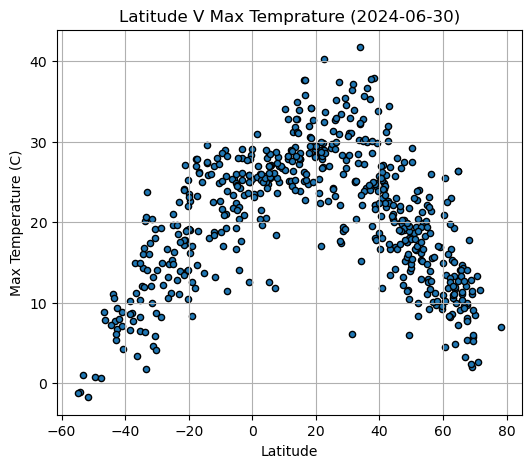

<Figure size 640x480 with 0 Axes>

In [76]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", grid=True, figsize=(6,5),
                 facecolors="lightskyblue",edgecolors="black")

from datetime import datetime

# Get the current date
current_date = datetime.now().strftime('%Y-%m-%d')

# Incorporate the other graph properties
plt.title(f"Latitude V Max Temprature ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.show()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

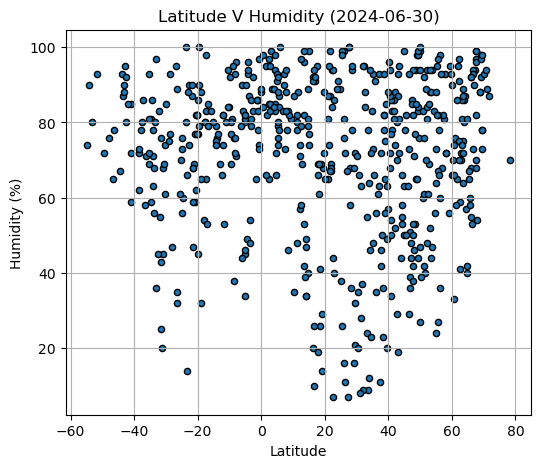

<Figure size 640x480 with 0 Axes>

In [77]:
# Build scatter plot for latitude vs. Humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", grid=True, figsize=(6,5),
                 facecolors="lightskyblue",edgecolors="black")

# Incorporate the other graph properties
plt.title(f"Latitude V Humidity ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

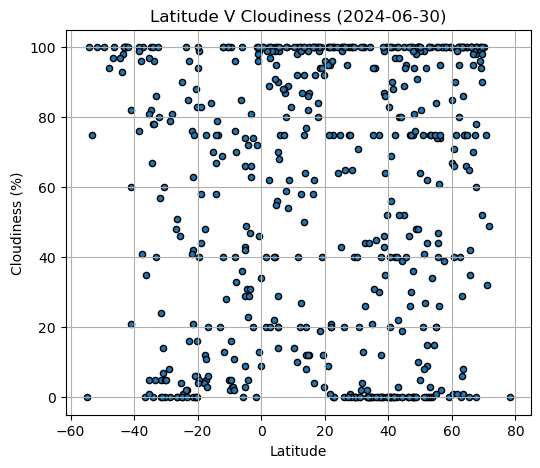

<Figure size 640x480 with 0 Axes>

In [78]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", grid=True, figsize=(6,5),
                 facecolors="lightskyblue",edgecolors="black")

# Incorporate the other graph properties
plt.title(f"Latitude V Cloudiness ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

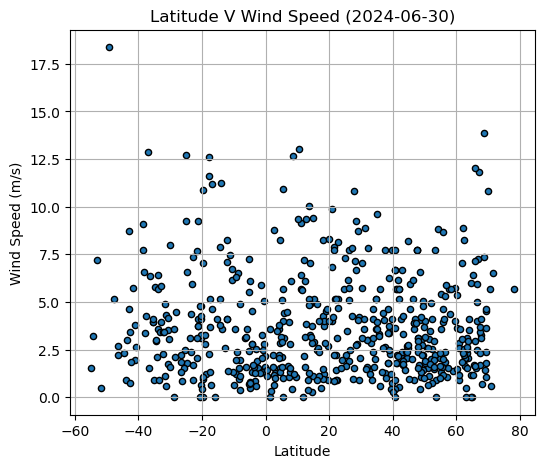

<Figure size 640x480 with 0 Axes>

In [79]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", grid=True, figsize=(6,5),
                 facecolors="lightskyblue",edgecolors="black")

# Incorporate the other graph properties
plt.title(f"Latitude V Wind Speed ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.show()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [145]:
# Define a function to create Linear Regression plots
def linear_regression_plot(datasets):
    """
    Parameters:
    datasets (list of tuples): Each tuple should contain:
                               (x, y, x_label, y_label, title)
                               where x and y are the data points,
                               x_label and y_label are the axis labels,
                               and title is the title prefix for the plot.
    """
    for index, (x, y, x_label, y_label, title_prefix) in enumerate(datasets):
        # Perform linear regression
        slope, intercept, r_value, p_value, std_err = linregress(x, y)

        # Create the regression line
        regress_values = slope * x + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        
        # Create the scatter plot
        plt.figure(index)
        plt.scatter(x, y)
        plt.plot(x, regress_values, color='red',label=f'y={slope:.2f}x+{intercept:.2f}')
        #plt.annotate(line_eq,(9,-10),fontsize=14,color="red")
        
        # Add titles and labels
        plt.title(title_prefix)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend()
        print(f"The r^2-value is: {r_value}")
        # Show all plots
        plt.show()

In [ ]:
# Define a function to create Linear Regression plots
def linear_regress_plot(x, y, eqn_coordinates):
    r = st.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [135]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,jamestown,42.0970,-79.2353,25.80,88,75,5.14,US,1719701687
1,kaedi,16.1465,-13.5047,37.60,20,58,4.87,MR,1719701689
3,ciudad lazaro cardenas,17.9583,-102.2000,28.56,69,80,4.27,MX,1719701694
4,ofunato,39.0717,141.7167,24.44,65,64,2.28,JP,1719701697
7,porbandar,21.6422,69.6093,29.01,87,95,7.87,IN,1719701705


In [136]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,naberera,-4.2000,36.9333,14.07,93,23,4.50,TZ,1719701692
5,blackmans bay,-43.0167,147.3167,5.41,90,100,4.65,AU,1719701699
6,gamba,-2.6500,10.0000,20.85,92,74,1.91,GA,1719701702
11,thulamahashi,-24.7246,31.1994,16.28,60,1,1.82,ZA,1719701715
13,mazagao,-0.1150,-51.2894,29.03,88,34,1.60,BR,1719701720


###  Temperature vs. Latitude Linear Regression Plot

In [ ]:
linear_regress_plot(northern_hemi_df['Lat'].rename("Latitude"), northern_hemi_df['Max Temp'].rename("Temrature(C)"S),(9,-10))

The r^2-value is: -0.6889816516203903


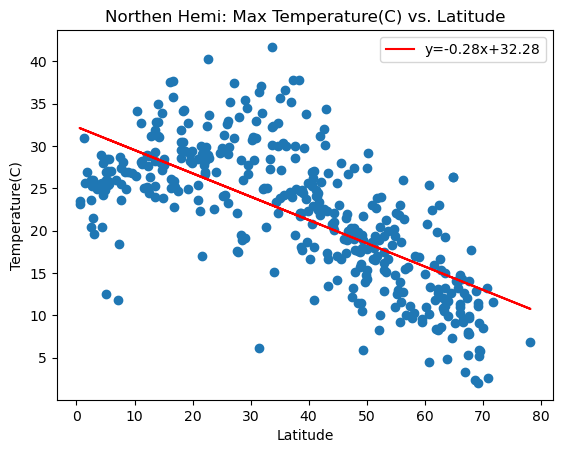

In [146]:


datasets = [ (northern_hemi_df['Lat'],northern_hemi_df['Max Temp'],"Latitude","Temperature(C)",
            "Northen Hemi: Max Temperature(C) vs. Latitude")]

linear_regression_plot(datasets)

The r^2-value is: 0.7939275594761867


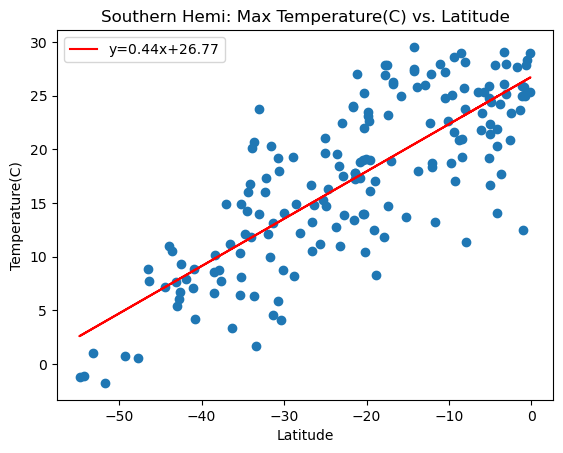

In [147]:
# Linear regression on Southern Hemisphere
datasets = [ (southern_hemi_df['Lat'],southern_hemi_df['Max Temp'],"Latitude","Temperature(C)",
            "Southern Hemi: Max Temperature(C) vs. Latitude")]

linear_regression_plot(datasets)

**Discussion about the linear relationship:** 
The R square value of the Northern Hemisphere is -0.689 which shows that the data is not suitable for this model.
The slope of -0.28 indicates an unreliable relationship between latitude and the temperature in the Northern Hemisphere. As latitude increases, the temperature decreases.

For the Southern Hemisphere, 
The R square value (0.79) indicates a strong fit to the linear model.
The slope value (0.44) suggests that there is a slightly positive correlation between latitude and temperature here. As the latitude increases, the temperature also increases.

Summary, 
Latitude vs temperature shows a strong linear relationship in the South Hemisphere (with a positive slope) but a poor fit in the North Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

In [148]:
northern_hemi_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

The r^2-value is: 0.023020638297231156


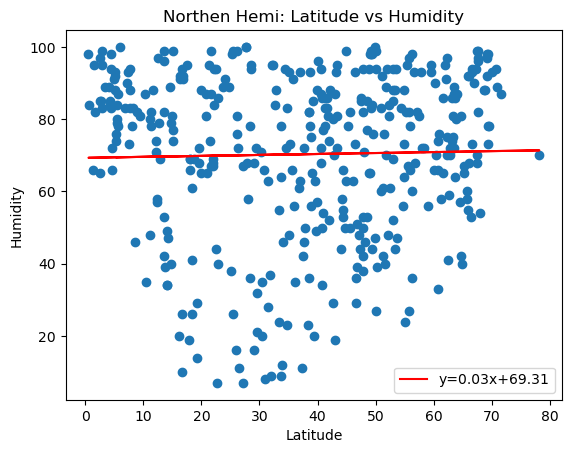

In [149]:
# Northern Hemisphere
datasets = [ (northern_hemi_df['Lat'],northern_hemi_df['Humidity'],"Latitude","Humidity",
            "Northen Hemi: Latitude vs Humidity")]

linear_regression_plot(datasets)

The r^2-value is: 0.06765811649734711


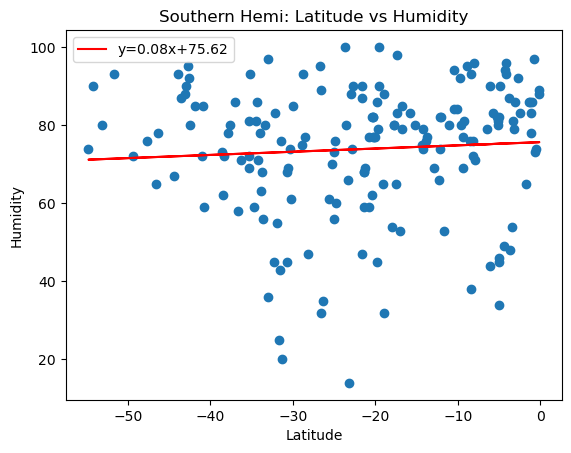

In [150]:
# Southern Hemisphere
datasets = [ (southern_hemi_df['Lat'],southern_hemi_df['Humidity'],"Latitude","Humidity",
            "Southern Hemi: Latitude vs Humidity")]

linear_regression_plot(datasets)

**Discussion about the linear relationship:** 
The R sqaure value for Nothen and southern Hemisphere both, is very low.
Which indicates a very weak linear relationship, suggesting that latitude is not a significant predictor of humidity.
The slope indicates a slight increase in humidity with latitude.As one moves from higher latitudes (closer to the equator) to lower latitudes (further south), there is a minor increase in humidity. However, the effect is very small.


### Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is: -0.016142582913941477


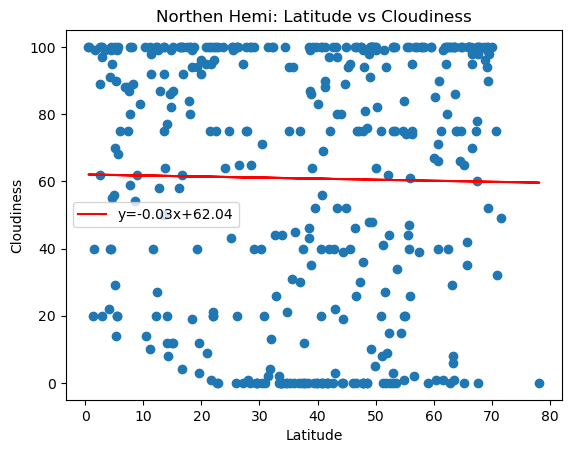

In [153]:
# Northern Hemisphere
datasets = [ (northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'],"Latitude","Cloudiness",
            "Northen Hemi: Latitude vs Cloudiness")]

linear_regression_plot(datasets)

The r^2-value is: -0.20446681354820628


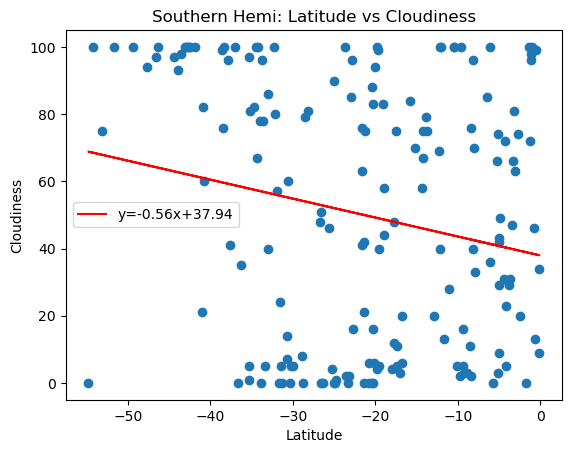

In [154]:
# Southern Hemisphere
datasets = [ (southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'],"Latitude","Cloudiness",
            "Southern Hemi: Latitude vs Cloudiness")]

linear_regression_plot(datasets)

**Discussion about the linear relationship:** 
Looking at the Regression Line Equation for Northern Hemisphere,
The slope is slightly negative (-0.03), indicating a very small decrease in cloudiness with increasing latitude.
There is an extremely weak negative correlation between latitude and cloudiness in the Northern Hemisphere.
As latitude increases, cloudiness slightly decreases.

For Southern Hemisphere:
The slope is more significantly negative (-0.56), indicating a moderate decrease in cloudiness with increasing latitude.
There is a moderate negative correlation between latitude and cloudiness in the Southern Hemisphere. 
As latitude increases, cloudiness tends to decrease more noticeably.

Summary and Implications:
Northern Hemisphere: The linear relationship between latitude and cloudiness is extremely weak and practically negligible.
Southern Hemisphere: Although there is a more noticeable decrease in cloudiness with increasing latitude.
The negative R-squared value indicates that the linear model is not suitable for predicting cloudiness based on latitude alone.
Other factors likely play a more significant role in determining cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

In [155]:
southern_hemi_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

The r^2-value is: -0.027296238933937383


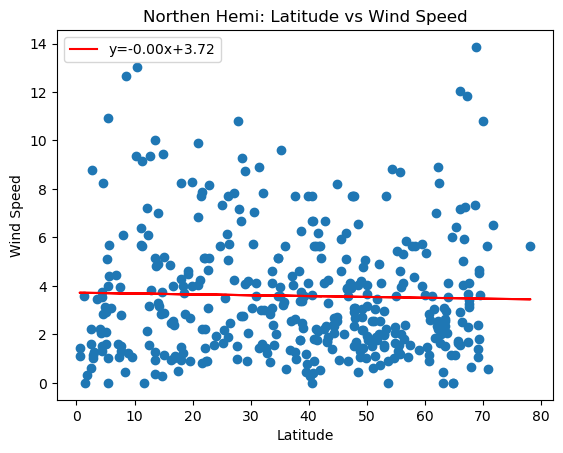

In [156]:
# Northern Hemisphere
datasets = [ (northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'],"Latitude","Wind Speed",
            "Northen Hemi: Latitude vs Wind Speed")]

linear_regression_plot(datasets)

The r^2-value is: -0.16287771316919855


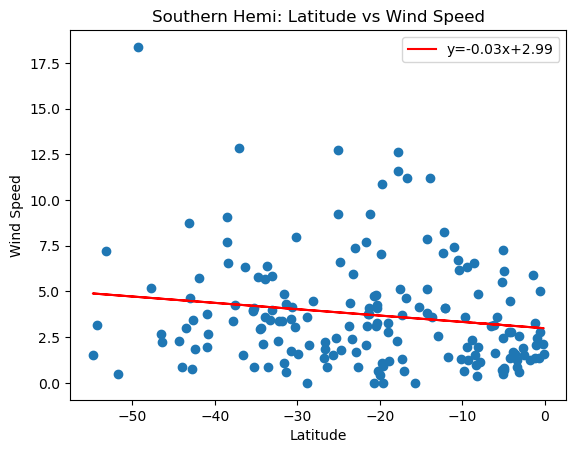

In [157]:
# Southern Hemisphere
datasets = [ (southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'],"Latitude","Wind Speed",
            "Southern Hemi: Latitude vs Wind Speed")]

linear_regression_plot(datasets)

**Discussion about the linear relationship:** 
Northern Hemisphere, 
The slope is essentially zero (-0.00), indicating no change in wind speed with respect to latitude.
Intercept (3.72) suggests that across all latitudes in the Northern Hemisphere, the average wind speed is approximately 3.72 units.
There is no significant correlation between latitude and wind speed in the Northern Hemisphere.

Southern Hemisphere, 
The slope is slightly negative(-0.03), indicating a very small decrease in wind speed with increasing latitude.
There is a very weak negative correlation between latitude and wind speed in the Southern Hemisphere. As latitude increases, wind speed decreases slightly.

A negative R-squared value in both the Northern and Southern hemispheres indicates that the linear model does not fit the data well and may not be appropriate for explaining the variability in wind speed based on latitude.